<a href="https://colab.research.google.com/github/achu5076/Medical_Waste_segregation/blob/main/CapstoneFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.14.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip list

In [ ]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import imghdr

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive2')

# Dataset path
dataset_path = '/content/drive2/MyDrive/MedicalWasteSplit'

# Path to the training directory
train_directory = os.path.join(dataset_path, 'train')

# Get class names (directory names in the train directory)
class_names = [item for item in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, item))]
print("Class names:", class_names)
class_names = os.listdir(train_directory)
for class_name in class_names:
    class_path = os.path.join(train_directory, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"Class '{class_name}' has {num_images} images")

In [ ]:
test_directory = os.path.join(dataset_path, 'test')
class_names = [item for item in os.listdir(test_directory) if os.path.isdir(os.path.join(test_directory, item))]
print("Class names:", class_names)
class_names = os.listdir(test_directory)
for class_name in class_names:
    class_path = os.path.join(test_directory, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"Class '{class_name}' has {num_images} images")


In [ ]:
validation_directory = os.path.join(dataset_path, 'validation')
class_names = [item for item in os.listdir(validation_directory) if os.path.isdir(os.path.join(validation_directory, item))]
print("Class names:", class_names)
class_names = os.listdir(validation_directory)
for class_name in class_names:
    class_path = os.path.join(validation_directory, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"Class '{class_name}' has {num_images} images")

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.image_paths = []
        self.image_labels = []

        for idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for image_file in os.listdir(class_dir):
                self.image_paths.append(os.path.join(class_dir, image_file))
                self.image_labels.append(idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.image_labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
from torchvision import transforms

transform_augmented = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Then use transform_augmented for the training dataset
train_dataset = CustomDataset(root_dir='/content/drive2/MyDrive/MedicalWasteSplit/train', transform=transform_augmented)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Use the original 'transform' for validation and test datasets


In [ ]:
import os

dataset_path = '/content/drive2/MyDrive/MedicalWasteSplit'

# Iterate through each set (train, test, validation)
for set_name in ['train', 'test', 'validation']:
    set_path = os.path.join(dataset_path, set_name)

    print(f"\n{set_name.capitalize()} set:")

    # Iterate through each class in the set
    for class_name in os.listdir(set_path):
        class_path = os.path.join(set_path, class_name)
        class_images = os.listdir(class_path)

        # Print the class name and map each image to the class
        print(f"Class '{class_name}' has {len(class_images)} images to name {class_name}:")

        for image_name in class_images:
            print(f"   {image_name} to name {class_name}")


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
data= tf.keras.utils.image_dataset_from_directory('/content/drive2/MyDrive/MedicalWasteSplit')

Found 4245 files belonging to 3 classes.


In [ ]:
def __getitem__(self, idx):
    if not self.image_class_mapping:
        # Return a placeholder image and a placeholder label if the mapping is empty
        return torch.zeros((3, 224, 224)), "placeholder_class"

    image_name = list(self.image_class_mapping.keys())[idx]
    image_class = self.image_class_mapping[image_name]
    image_path = os.path.join(self.root_dir, image_class, image_name)

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    if self.transform:
        image = self.transform(image)

    return image, image_class


In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


In [ ]:
def show_images(data_loader, class_names, num_images=4):
    # Get a batch of images
    images, labels = next(iter(data_loader))

    # Select a few images
    images = images[:num_images]
    labels = labels[:num_images]

    # Make a grid from batch
    out = make_grid(images)

    # Plot the images
    plt.figure(figsize=(15, 5))
    plt.imshow(out.permute(1, 2, 0))  # Convert from Tensor image
    plt.title('Sample Images')
    plt.axis('off')

    # Print the labels
    class_labels = [class_names[label] for label in labels]
    for i, class_label in enumerate(class_labels):
        plt.text(-10, i * 50 + 25, class_label, style='italic', fontweight='bold', backgroundcolor='white')

    plt.show()


In [ ]:

# Assuming CustomDataset is defined and transform is set
train_dataset = CustomDataset(root_dir='/content/drive2/MyDrive/MedicalWasteSplit/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
validation_dataset = CustomDataset(root_dir='/content/drive2/MyDrive/MedicalWasteSplit/validation', transform=transform)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True)



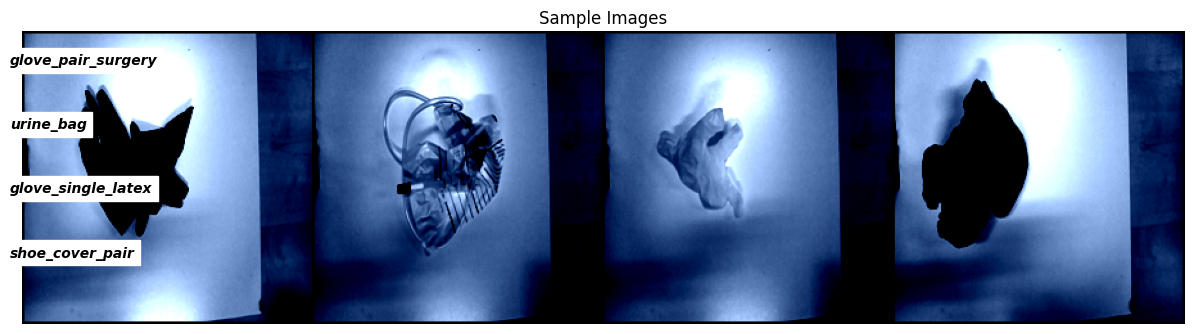

In [ ]:
# Assuming train_loader is your DataLoader instance and class_names is a list of class names
show_images(train_loader, class_names, num_images=4)


In [ ]:
from torchvision import models

# Load a pre-trained model
model = models.resnet50(pretrained=True)

# Freeze the layers for feature extraction
for param in model.parameters():
    param.requires_grad = False


In [ ]:
# Adjust the final layer of the pre-trained model
num_classes = len(class_names)  # Number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
import torch.optim as optim
import torch.nn as nn

# Assuming model is your model instance
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 10
train_accuracy_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_accuracy = train_correct / total_train
    train_accuracy_history.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = val_correct / total_val
    val_accuracy_history.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss/len(train_loader):.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss/len(validation_loader):.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.2732, Train Accuracy: 0.9141, Validation Loss: 0.2888, Validation Accuracy: 0.8824
Epoch 2/10, Train Loss: 0.2397, Train Accuracy: 0.9221, Validation Loss: 0.2635, Validation Accuracy: 0.8951
Epoch 3/10, Train Loss: 0.2370, Train Accuracy: 0.9201, Validation Loss: 0.2452, Validation Accuracy: 0.9030
Epoch 4/10, Train Loss: 0.2144, Train Accuracy: 0.9319, Validation Loss: 0.2446, Validation Accuracy: 0.9030
Epoch 5/10, Train Loss: 0.2021, Train Accuracy: 0.9376, Validation Loss: 0.2370, Validation Accuracy: 0.9141
Epoch 6/10, Train Loss: 0.1955, Train Accuracy: 0.9363, Validation Loss: 0.2479, Validation Accuracy: 0.8919
Epoch 7/10, Train Loss: 0.1997, Train Accuracy: 0.9238, Validation Loss: 0.2332, Validation Accuracy: 0.9030
Epoch 8/10, Train Loss: 0.1729, Train Accuracy: 0.9424, Validation Loss: 0.1988, Validation Accuracy: 0.9269
Epoch 9/10, Train Loss: 0.1790, Train Accuracy: 0.9373, Validation Loss: 0.1970, Validation Accuracy: 0.9253
Epoch 10/10, Train 

In [ ]:
num_epochs = 20
train_accuracy_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_accuracy = train_correct / total_train
    train_accuracy_history.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = val_correct / total_val
    val_accuracy_history.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss/len(train_loader):.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss/len(validation_loader):.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/20, Train Loss: 1.3333, Train Accuracy: 0.6171, Validation Loss: 0.7019, Validation Accuracy: 0.8108
Epoch 2/20, Train Loss: 0.5617, Train Accuracy: 0.8517, Validation Loss: 0.5040, Validation Accuracy: 0.8267
Epoch 3/20, Train Loss: 0.4240, Train Accuracy: 0.8729, Validation Loss: 0.3735, Validation Accuracy: 0.8776
Epoch 4/20, Train Loss: 0.3463, Train Accuracy: 0.8895, Validation Loss: 0.3043, Validation Accuracy: 0.8983
Epoch 5/20, Train Loss: 0.3131, Train Accuracy: 0.9006, Validation Loss: 0.2963, Validation Accuracy: 0.8919
Epoch 6/20, Train Loss: 0.2619, Train Accuracy: 0.9184, Validation Loss: 0.2717, Validation Accuracy: 0.8935
Epoch 7/20, Train Loss: 0.2550, Train Accuracy: 0.9137, Validation Loss: 0.2633, Validation Accuracy: 0.8951
Epoch 8/20, Train Loss: 0.2228, Train Accuracy: 0.9339, Validation Loss: 0.2378, Validation Accuracy: 0.9141
Epoch 9/20, Train Loss: 0.2139, Train Accuracy: 0.9245, Validation Loss: 0.2390, Validation Accuracy: 0.8967
Epoch 10/20, Train 

In [ ]:
num_epochs = 20
train_accuracy_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_accuracy = train_correct / total_train
    train_accuracy_history.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_accuracy = val_correct / total_val
    val_accuracy_history.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss/len(train_loader):.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss/len(validation_loader):.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/20, Train Loss: 1.3179, Train Accuracy: 0.6191, Validation Loss: 0.6840, Validation Accuracy: 0.8156
Epoch 2/20, Train Loss: 0.5459, Train Accuracy: 0.8622, Validation Loss: 0.4353, Validation Accuracy: 0.8776
Epoch 3/20, Train Loss: 0.4007, Train Accuracy: 0.8810, Validation Loss: 0.3572, Validation Accuracy: 0.8728
Epoch 4/20, Train Loss: 0.3451, Train Accuracy: 0.8915, Validation Loss: 0.3176, Validation Accuracy: 0.8855
Epoch 5/20, Train Loss: 0.3046, Train Accuracy: 0.9002, Validation Loss: 0.2971, Validation Accuracy: 0.8951
Epoch 6/20, Train Loss: 0.2644, Train Accuracy: 0.9178, Validation Loss: 0.2721, Validation Accuracy: 0.8951
Epoch 7/20, Train Loss: 0.2424, Train Accuracy: 0.9157, Validation Loss: 0.2485, Validation Accuracy: 0.9126
Epoch 8/20, Train Loss: 0.2209, Train Accuracy: 0.9269, Validation Loss: 0.2345, Validation Accuracy: 0.9173
Epoch 9/20, Train Loss: 0.2245, Train Accuracy: 0.9242, Validation Loss: 0.2286, Validation Accuracy: 0.9110
Epoch 10/20, Train 

In [ ]:
test_dataset = CustomDataset(root_dir='/content/drive2/MyDrive/MedicalWasteSplit/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


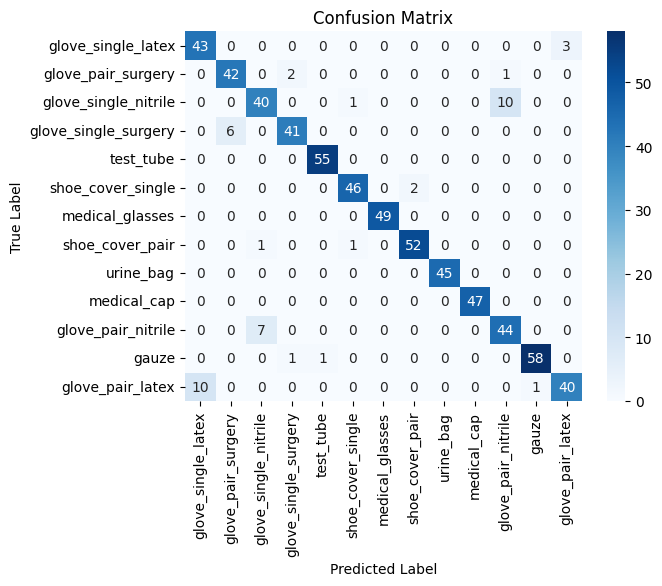

In [ ]:
# Test phase
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


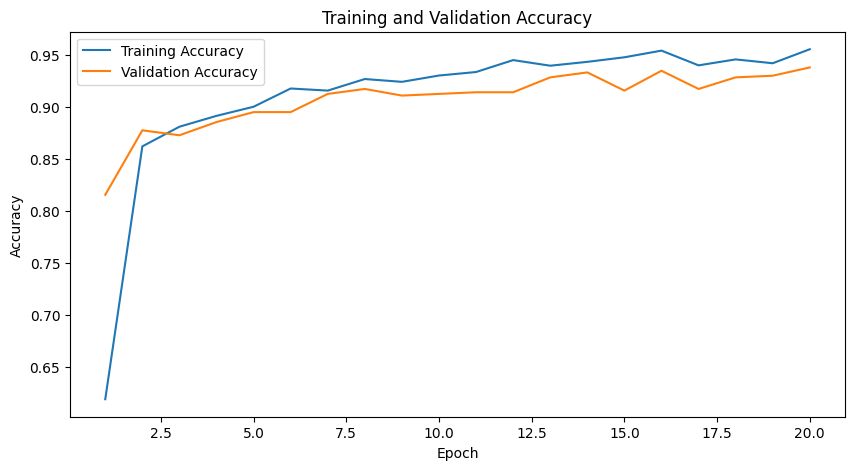

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
def predict_func(img, model):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(img.to(device))
    return outputs


In [ ]:
import numpy as np
class_names = ['glove_single_latex', 'glove_pair_surgery', 'glove_single_nitrile', 'glove_single_surgery',
               'test_tube', 'shoe_cover_single', 'medical_glasses', 'shoe_cover_pair', 'urine_bag',
               'medical_cap', 'glove_pair_nitrile', 'gauze', 'glove_pair_latex']

<ipython-input-34-3f06e251c9e0>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean, device=image.device).view(-1, 1, 1)
<ipython-input-34-3f06e251c9e0>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std = torch.tensor(std, device=image.device).view(-1, 1, 1)
<ipython-input-35-30fcb8955583>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean = torch.tensor(mean, device=image.device).view(-1, 1, 1)
<ipython-input-35-30fcb8955583>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTenso

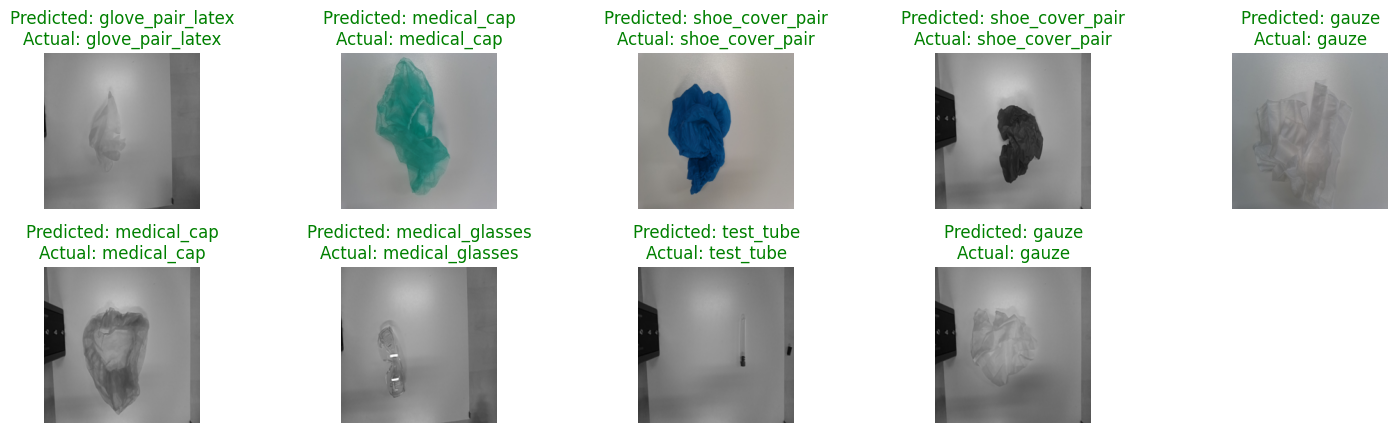

In [ ]:
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
denormalize(img_cpu, mean, std)
def denormalize(image, mean, std):
    # Assuming image is a tensor on 'cuda' (GPU)
    mean = torch.tensor(mean, device=image.device).view(-1, 1, 1)
    std = torch.tensor(std, device=image.device).view(-1, 1, 1)
    return image * std + mean

# Ensure the model is in evaluation mode
model.eval()

# Setup the figure for visualization
plt.figure(figsize=(15, 13))

# Loop through the images to display
for i in range(min(len(images), 30)):
    ax = plt.subplot(6, 5, i + 1)  # Adjust the subplot grid as needed

    # Move the image to CPU and denormalize
    img_cpu = images[i].to('cpu')
    img_denorm = denormalize(img_cpu, mean, std)
    img_denorm = img_denorm.permute(1, 2, 0)  # Rearrange color channels for matplotlib
    img_denorm = img_denorm.clamp(0, 1)  # Clamp the values to the valid range for imshow

    # Display the denormalized image
    plt.imshow(img_denorm.numpy())  # Convert to numpy array for plotting

    # Get the model's predictions
    outputs = model(images[i].unsqueeze(0).to(device))  # Add batch dimension and move to device
    _, preds_tensor = torch.max(outputs, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not device.type == 'cuda' else np.squeeze(preds_tensor.cpu().numpy())

    # Get the predicted and actual class names
    pred_class = class_names[preds]
    actual_class = class_names[labels[i]]

    # Set the title with the predicted class
    # Use green if the prediction is correct, red otherwise
    title_color = 'green' if pred_class == actual_class else 'red'
    plt.title(f"Predicted: {pred_class}\nActual: {actual_class}", color=title_color)
    plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()
